In [1]:

import vertexai
from google.cloud import bigquery
from tools import *
from bq import save_bq


PROJECT_ID = "ml-demo-384110"  # @param {type:"string"}
vertexai.init(project=PROJECT_ID, location="us-central1")
client = bigquery.Client(project=PROJECT_ID)
bucket = "ml-demo-384110-bucket"

%load_ext google.cloud.bigquery

In [9]:
%%bigquery df

select uri, multi_embeddings_image from `ml-demo-384110.immo_us_enriched.vqa_embeddings_multimodal`

Query is running:   0%|          |

Downloading:   0%|          |

In [35]:
from bq import save_bq

for num_clusters in [ 50]:#[3, 5, 8, 10, 15, 20, 30, 40]:
    sql = f"""
    CREATE OR REPLACE MODEL `ml-demo-384110.immo_us_enriched.vqa_embeddings_multimodal_clustering_{num_clusters}`
    OPTIONS (
    model_type = 'KMEANS',
    KMEANS_INIT_METHOD = 'KMEANS++',
    num_clusters = {num_clusters},
    DISTANCE_TYPE = 'COSINE'
    ) AS ( SELECT multi_embeddings_image from `ml-demo-384110.immo_us_enriched.vqa_embeddings_multimodal` );
    """
    print(sql)
       
    query_job = client.query(sql)
    print(query_job.result())




    CREATE OR REPLACE MODEL `ml-demo-384110.immo_us_enriched.vqa_embeddings_multimodal_clustering_50`
    OPTIONS (
    model_type = 'KMEANS',
    KMEANS_INIT_METHOD = 'KMEANS++',
    num_clusters = 50,
    DISTANCE_TYPE = 'COSINE'
    ) AS ( SELECT multi_embeddings_image from `ml-demo-384110.immo_us_enriched.vqa_embeddings_multimodal` );
    


In [38]:
from bq import save_bq

df = pd.DataFrame()
for num_clusters in [3, 5, 8, 10, 15, 20, 25, 30, 35, 40, 45, 50]:
    sql = f"""
    SELECT {num_clusters} as cluster,* FROM ML.EVALUATE(
    MODEL `ml-demo-384110.immo_us_enriched.vqa_embeddings_multimodal_clustering_{num_clusters}`, 
    TABLE `ml-demo-384110.immo_us_enriched.vqa_embeddings_multimodal` 
    )
    """

    #print(sql)
       
    query_job = client.query(sql)
    print(query_job.result())
    df2 = query_job.to_dataframe()
    df = df.append(df2, ignore_index=True) 

df

/var/folders/2_/jl1djv6975g5c0pygxnl873w00pwkm/T/ipykernel_21197/3806852005.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2, ignore_index=True)


/var/folders/2_/jl1djv6975g5c0pygxnl873w00pwkm/T/ipykernel_21197/3806852005.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2, ignore_index=True)


/var/folders/2_/jl1djv6975g5c0pygxnl873w00pwkm/T/ipykernel_21197/3806852005.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2, ignore_index=True)


/var/folders/2_/jl1djv6975g5c0pygxnl873w00pwkm/T/ipykernel_21197/3806852005.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2, ignore_index=True)


/var/folders/2_/jl1djv6975g5c0pygxnl873w00pwkm/T/ipykernel_21197/3806852005.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2, ignore_index=True)


/var/folders/2_/jl1djv6975g5c0pygxnl873w00pwkm/T/ipykernel_21197/3806852005.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2, ignore_index=True)


/var/folders/2_/jl1djv6975g5c0pygxnl873w00pwkm/T/ipykernel_21197/3806852005.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2, ignore_index=True)


/var/folders/2_/jl1djv6975g5c0pygxnl873w00pwkm/T/ipykernel_21197/3806852005.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2, ignore_index=True)


/var/folders/2_/jl1djv6975g5c0pygxnl873w00pwkm/T/ipykernel_21197/3806852005.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2, ignore_index=True)


/var/folders/2_/jl1djv6975g5c0pygxnl873w00pwkm/T/ipykernel_21197/3806852005.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2, ignore_index=True)


/var/folders/2_/jl1djv6975g5c0pygxnl873w00pwkm/T/ipykernel_21197/3806852005.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2, ignore_index=True)


/var/folders/2_/jl1djv6975g5c0pygxnl873w00pwkm/T/ipykernel_21197/3806852005.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2, ignore_index=True)


,cluster,davies_bouldin_index,mean_squared_distance
0,3,2.566186,0.257958
1,5,2.474945,0.224734
2,8,2.169476,0.206735
3,10,2.613151,0.199800
4,15,1.901273,0.180223
5,20,2.026541,0.176564
6,25,1.878505,0.160570
7,30,1.861969,0.150204
8,35,1.745850,0.141969
9,40,1.660727,0.148365


<Axes: xlabel='cluster'>

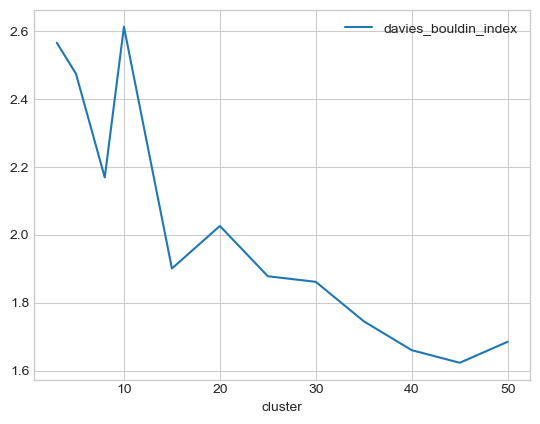

In [43]:
import matplotlib.pyplot as plt

#plt.close("all")

#plt.figure()

df.plot(x="cluster", y=[#"mean_squared_distance"
                        "davies_bouldin_index"]
        )

In [44]:
%%bigquery df

select e.CENTROID_ID, e.caption_en,   n.DISTANCE 
from  `ml-demo-384110.immo_us_enriched.vqa_embeddings_multimodal_clustering_40_eval` e,
unnest(NEAREST_CENTROIDS_DISTANCE) n 
where n.CENTROID_ID = e.CENTROID_ID
order by e.CENTROID_ID, distance




Query is running:   0%|          |

Downloading:   0%|          |

In [45]:
df.describe()


,CENTROID_ID,DISTANCE
count,686.0,686.000000
mean,23.462099,0.371107
std,10.374908,0.103246
min,1.0,0.000000
25%,13.0,0.312101
50%,24.0,0.372122
75%,32.75,0.431136
max,40.0,0.610699


In [50]:
%%bigquery df
select e.CENTROID_ID, 

 #variance( n.DISTANCE ) Distance_Variance, 
 
 count(*) count_by_cluster
from  `ml-demo-384110.immo_us_enriched.vqa_embeddings_multimodal_clustering_40_eval` e,
unnest(NEAREST_CENTROIDS_DISTANCE) n 
where n.CENTROID_ID = e.CENTROID_ID
group by e.CENTROID_ID 
order by e.CENTROID_ID 



Query is running:   0%|          |

Downloading:   0%|          |

In [51]:
df.describe()


,CENTROID_ID,count_by_cluster
count,40.0,40.0
mean,20.5,17.15
std,11.690452,19.605795
min,1.0,1.0
25%,10.75,2.0
50%,20.5,12.0
75%,30.25,20.0
max,40.0,75.0


<Axes: >

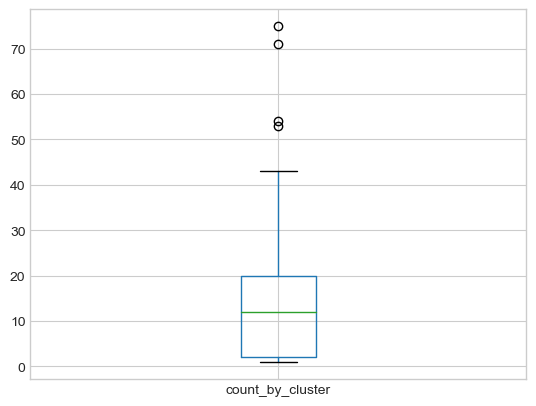

In [55]:
df.boxplot("count_by_cluster")

In [ ]:
create table `ml-demo-384110.immo_us_enriched.vqa_embeddings_multimodal_clustering_15_40_eval` as (
SELECT c40.uri, c15.CENTROID_ID CENTROID_ID, c40.CENTROID_ID SUB_CENTROID_ID, c40.caption_en , c15.caption_fr
#* #caption_en, CENTROID_ID
#except(NEAREST_CENTROIDS_DISTANCE, fr_text_embedding, en_text_embedding, tr_text_embedding) 
FROM ML.PREDICT(MODEL `ml-demo-384110.immo_us_enriched.vqa_embeddings_multimodal_clustering_40`, 
    TABLE `ml-demo-384110.immo_us_enriched.vqa_embeddings_multimodal` 
) c40
,ML.PREDICT(MODEL `ml-demo-384110.immo_us_enriched.vqa_embeddings_multimodal_clustering_15`, 
    TABLE `ml-demo-384110.immo_us_enriched.vqa_embeddings_multimodal` 
) c15
where c40.uri = c15.uri 
and  c40.caption_en = c15.caption_en 
and  c40.caption_fr = c15.caption_fr
)

In [ ]:
%%bigquery
## Number of Cluster Optimisation 

 CREATE OR REPLACE MODEL `ml-demo-384110.immo_us_enriched.vqa_embeddings_multimodal_clusters_tuning`
    OPTIONS (
      
    model_type = 'KMEANS',
    KMEANS_INIT_METHOD = 'KMEANS++',
    #num_clusters = 50,
    DISTANCE_TYPE = 'COSINE',

     NUM_TRIALS = 50,
         MAX_PARALLEL_TRIALS = 5 ,
         HPARAM_TUNING_ALGORITHM = 'VIZIER_DEFAULT' , #| 'RANDOM_SEARCH' | 'GRID_SEARCH' } ]
         num_clusters=HPARAM_RANGE(3, 50) #| HPARAM_CANDIDATES("num_clusters") }
#        [, HPARAM_TUNING_OBJECTIVES = { 'R2_SCORE' | 'ROC_AUC' | ... } ]
#        [, DATA_SPLIT_METHOD = { 'AUTO_SPLIT' | 'RANDOM' | 'CUSTOM' | 'SEQ' | 'NO_SPLIT' } ]
#        [, DATA_SPLIT_COL = string_value ]
#        [, DATA_SPLIT_EVAL_FRACTION = float64_value ]
#        [, DATA_SPLIT_TEST_FRACTION = float64_value ]




    ) AS ( SELECT multi_embeddings_image from `ml-demo-384110.immo_us_enriched.vqa_embeddings_multimodal` );

In [ ]:
%%bigquery

    SELECT * FROM ML.EVALUATE(
    MODEL `ml-demo-384110.immo_us_enriched.vqa_embeddings_multimodal_clusters_tuning`, 
    TABLE `ml-demo-384110.immo_us_enriched.vqa_embeddings_multimodal` 
    )

In [58]:
%%bigquery df



    SELECT hyperparameters.num_clusters, training_loss, hparam_tuning_evaluation_metrics.davies_bouldin_index 
    FROM ML.TRIAL_INFO(
    MODEL `ml-demo-384110.immo_us_enriched.vqa_embeddings_multimodal_clusters_tuning`    
    ) 


Query is running:   0%|          |

Downloading:   0%|          |

In [59]:
df.describe()

,num_clusters,training_loss,davies_bouldin_index
count,48.0,48.000000,48.000000
mean,26.5,0.164747,1.951196
std,14.0,0.034379,0.306068
min,3.0,0.123127,1.499360
25%,14.75,0.138500,1.742557
50%,26.5,0.153235,1.875032
75%,38.25,0.183457,2.074025
max,50.0,0.248745,3.028870


<Axes: >

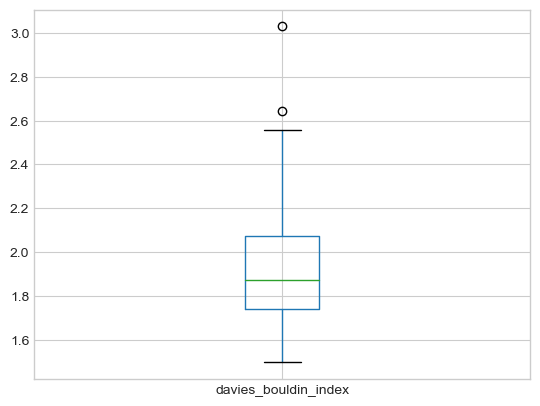

In [61]:
df.boxplot("davies_bouldin_index")


In [ ]:
%%bigquery

    SELECT hyperparameters.num_clusters, training_loss, hparam_tuning_evaluation_metrics.davies_bouldin_index davies_bouldin_index, is_optimal
    FROM ML.TRIAL_INFO(
    MODEL `ml-demo-384110.immo_us_enriched.vqa_embeddings_multimodal_clusters_tuning`    
    ) 
where  hparam_tuning_evaluation_metrics.davies_bouldin_index < 1.742557
order by hyperparameters.num_clusters



In [ ]:
%%bigquery

create table `ml-demo-384110.immo_us_enriched.vqa_embeddings_multimodal_clustering_15_47_eval` as (
SELECT c40.uri, c15.CENTROID_ID CENTROID_ID, c40.CENTROID_ID SUB_CENTROID_ID, c40.caption_en , c15.caption_fr
#* #caption_en, CENTROID_ID
#except(NEAREST_CENTROIDS_DISTANCE, fr_text_embedding, en_text_embedding, tr_text_embedding) 
FROM ML.PREDICT(MODEL immo_us_enriched.vqa_embeddings_multimodal_clusters_tuning, 
    TABLE `ml-demo-384110.immo_us_enriched.vqa_embeddings_multimodal` 
) c40
,ML.PREDICT(MODEL `ml-demo-384110.immo_us_enriched.vqa_embeddings_multimodal_clustering_15`, 
    TABLE `ml-demo-384110.immo_us_enriched.vqa_embeddings_multimodal` 
) c15
where c40.uri = c15.uri 
and  c40.caption_en = c15.caption_en 
and  c40.caption_fr = c15.caption_fr
)



In [ ]:
select CENTROID_ID, SUB_CENTROID_ID,
 count(*) count_by_cluster
from  `ml-demo-384110.immo_us_enriched.vqa_embeddings_multimodal_clustering_15_47_eval` 

group by CENTROID_ID, SUB_CENTROID_ID 
order by CENTROID_ID , SUB_CENTROID_ID

In [65]:
%%bigquery df
select uri, SUB_CENTROID_ID
from  `ml-demo-384110.immo_us_enriched.vqa_embeddings_multimodal_clustering_15_47_eval` 
order by SUB_CENTROID_ID



Query is running:   0%|          |

Downloading:   0%|          |

In [66]:
df.to_csv("images_classification_47.csv", index=False)



In [64]:
%%bigquery

create table `ml-demo-384110.immo_us_enriched.vqa_embeddings_multimodal_clustering_15_47_eval_summary` as (    

WITH DATA AS (
  SELECT distinct 
    c40.uri,
    c15.CENTROID_ID CENTROID_ID,
    c40.CENTROID_ID SUB_CENTROID_ID,
    c40.caption_en,
    c15.caption_fr
    #* #caption_en, CENTROID_ID
    #except(NEAREST_CENTROIDS_DISTANCE, fr_text_embedding, en_text_embedding, tr_text_embedding)
  FROM
    ML.PREDICT(MODEL immo_us_enriched.vqa_embeddings_multimodal_clusters_tuning,
      TABLE `ml-demo-384110.immo_us_enriched.vqa_embeddings_multimodal` ) c40,
    ML.PREDICT(MODEL `ml-demo-384110.immo_us_enriched.vqa_embeddings_multimodal_clustering_15`,
      TABLE `ml-demo-384110.immo_us_enriched.vqa_embeddings_multimodal` ) c15
  WHERE
    c40.uri = c15.uri
    AND c40.caption_en = c15.caption_en
    AND c40.caption_fr = c15.caption_fr 
    
    )
    

SELECT
  ml_generate_text_llm_result as centroid_summary, * #except(ml_generate_text_status)
FROM
  ML.GENERATE_TEXT( MODEL `immo_us_enriched.bqml-llm_model`,
    (
    SELECT
      CENTROID_ID, uri, caption_fr,caption_en, 
      CONCAT( "Summarise and list the 3 main topics of the following text in French in order of importance: \n", caption_fr, ".\n	Les 3 principaux sujets du texte sont : \n" ) AS prompt
    FROM
      DATA ),
    STRUCT(0.2 AS temperature,
      1000 AS max_output_tokens,
      1.0 AS top_p,
      20 AS top_k,
      TRUE AS flatten_json_output) ) AS ml_results 
)
      ;

Executing query with job ID: 491074d5-85e4-4f9f-b4da-e22db5adc9e8
Query executing: 518.50s

KeyboardInterrupt: 